# Food Price Prediction Machine Learning Algorithm - Ganesh Ram Gururajan

Over 740k rows of prices obtained in developing world markets for various goods. Data includes information on country, market, price of good in local currency, quantity of good, and month recorded.

Compiled by the World Food Program and distributed by HDX.

### Global food price fluctuations can cause famine and large population shifts. Price changes are increasingly critical to policymakers as global warming threatens to destabilize the food supply.

### This data would be particularly interesting to pair with currency fluctuations, weather patterns, and/or refugee movements--do any price changes in certain staples predict population upheaval? Do certain weather conditions influence market prices?

# We import the required packages for Data Analysis

In [10]:
import pandas as pd
import seaborn as sns

In [45]:
import matplotlib.pyplot as plt

# Basic Data Visualization, Cleaning, and Data Imputation

In [7]:
data = pd.read_csv('C:/Users/ganes/Data Science/Datasets/wfp_market_food_prices.csv', engine='python')

In [8]:
data.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


In [43]:
data.columns

Index(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource'],
      dtype='object')

In [9]:
data.shape

(743914, 18)

In [11]:
data.info

<bound method DataFrame.info of         adm0_id    adm0_name  adm1_id          adm1_name  mkt_id  mkt_name  \
0             1  Afghanistan      272         Badakhshan     266  Fayzabad   
1             1  Afghanistan      272         Badakhshan     266  Fayzabad   
2             1  Afghanistan      272         Badakhshan     266  Fayzabad   
3             1  Afghanistan      272         Badakhshan     266  Fayzabad   
4             1  Afghanistan      272         Badakhshan     266  Fayzabad   
...         ...          ...      ...                ...     ...       ...   
743909    70001  South Sudan     2750  Eastern Equatoria    1786     Torit   
743910    70001  South Sudan     2750  Eastern Equatoria    1786     Torit   
743911    70001  South Sudan     2750  Eastern Equatoria    1786     Torit   
743912    70001  South Sudan     2750  Eastern Equatoria    1786     Torit   
743913    70001  South Sudan     2750  Eastern Equatoria    1786     Torit   

        cm_id                 c

In [12]:
data.describe()

,adm0_id,adm1_id,mkt_id,cm_id,cur_id,pt_id,um_id,mp_month,mp_year,mp_price
count,743914.000000,743914.000000,743914.000000,743914.000000,743914.000000,743914.000000,743914.000000,743914.000000,743914.000000,7.439140e+05
mean,929.754832,17779.426232,885.962341,161.130914,57.325319,14.930508,10.562171,6.379772,2012.516549,4.196333e+03
std,6595.353806,81345.242217,540.492854,117.826297,23.140366,0.277872,13.160485,3.434972,3.669519,5.549296e+04
min,1.000000,0.000000,80.000000,50.000000,22.000000,14.000000,5.000000,1.000000,1992.000000,0.000000e+00
25%,115.000000,1510.000000,377.000000,67.000000,30.000000,15.000000,5.000000,3.000000,2011.000000,3.000000e+01
50%,170.000000,2207.000000,912.000000,110.000000,63.000000,15.000000,5.000000,6.000000,2013.000000,1.750000e+02
75%,205.000000,21969.000000,1134.000000,233.000000,77.000000,15.000000,5.000000,9.000000,2015.000000,5.000000e+02
max,70001.000000,900022.000000,2094.000000,490.000000,95.000000,18.000000,100.000000,12.000000,2017.000000,5.833333e+06


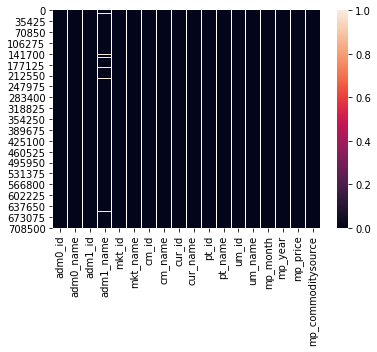

In [13]:
sns.heatmap(data.isnull())

In [17]:
len(data['adm1_id'].value_counts().index)

605

In [18]:
len(data['adm1_name'].value_counts().index)

588

In [25]:
data[data['adm1_name'].isnull() == True]['adm1_id'].value_counts()

0        11904
40429     1184
40424      861
Name: adm1_id, dtype: int64

In [40]:
data.dropna(inplace=True)

## We have an imputed dataset (we have no missing values in the dataset which is denoted by the pink colour)

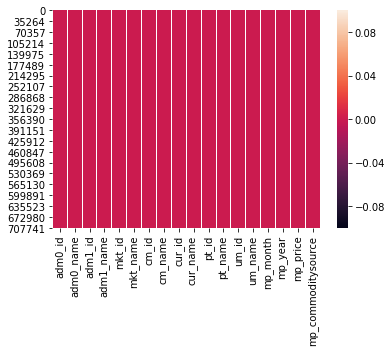

In [41]:
sns.heatmap(data.isnull())

In [42]:
data.shape

(729965, 18)

# Visualizing the correlation between various features

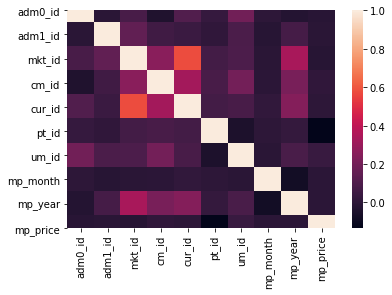

In [44]:
sns.heatmap(data.corr())

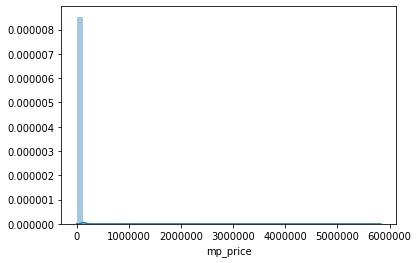

In [46]:
sns.distplot(data['mp_price'])

Text(0, 0.5, 'Price')

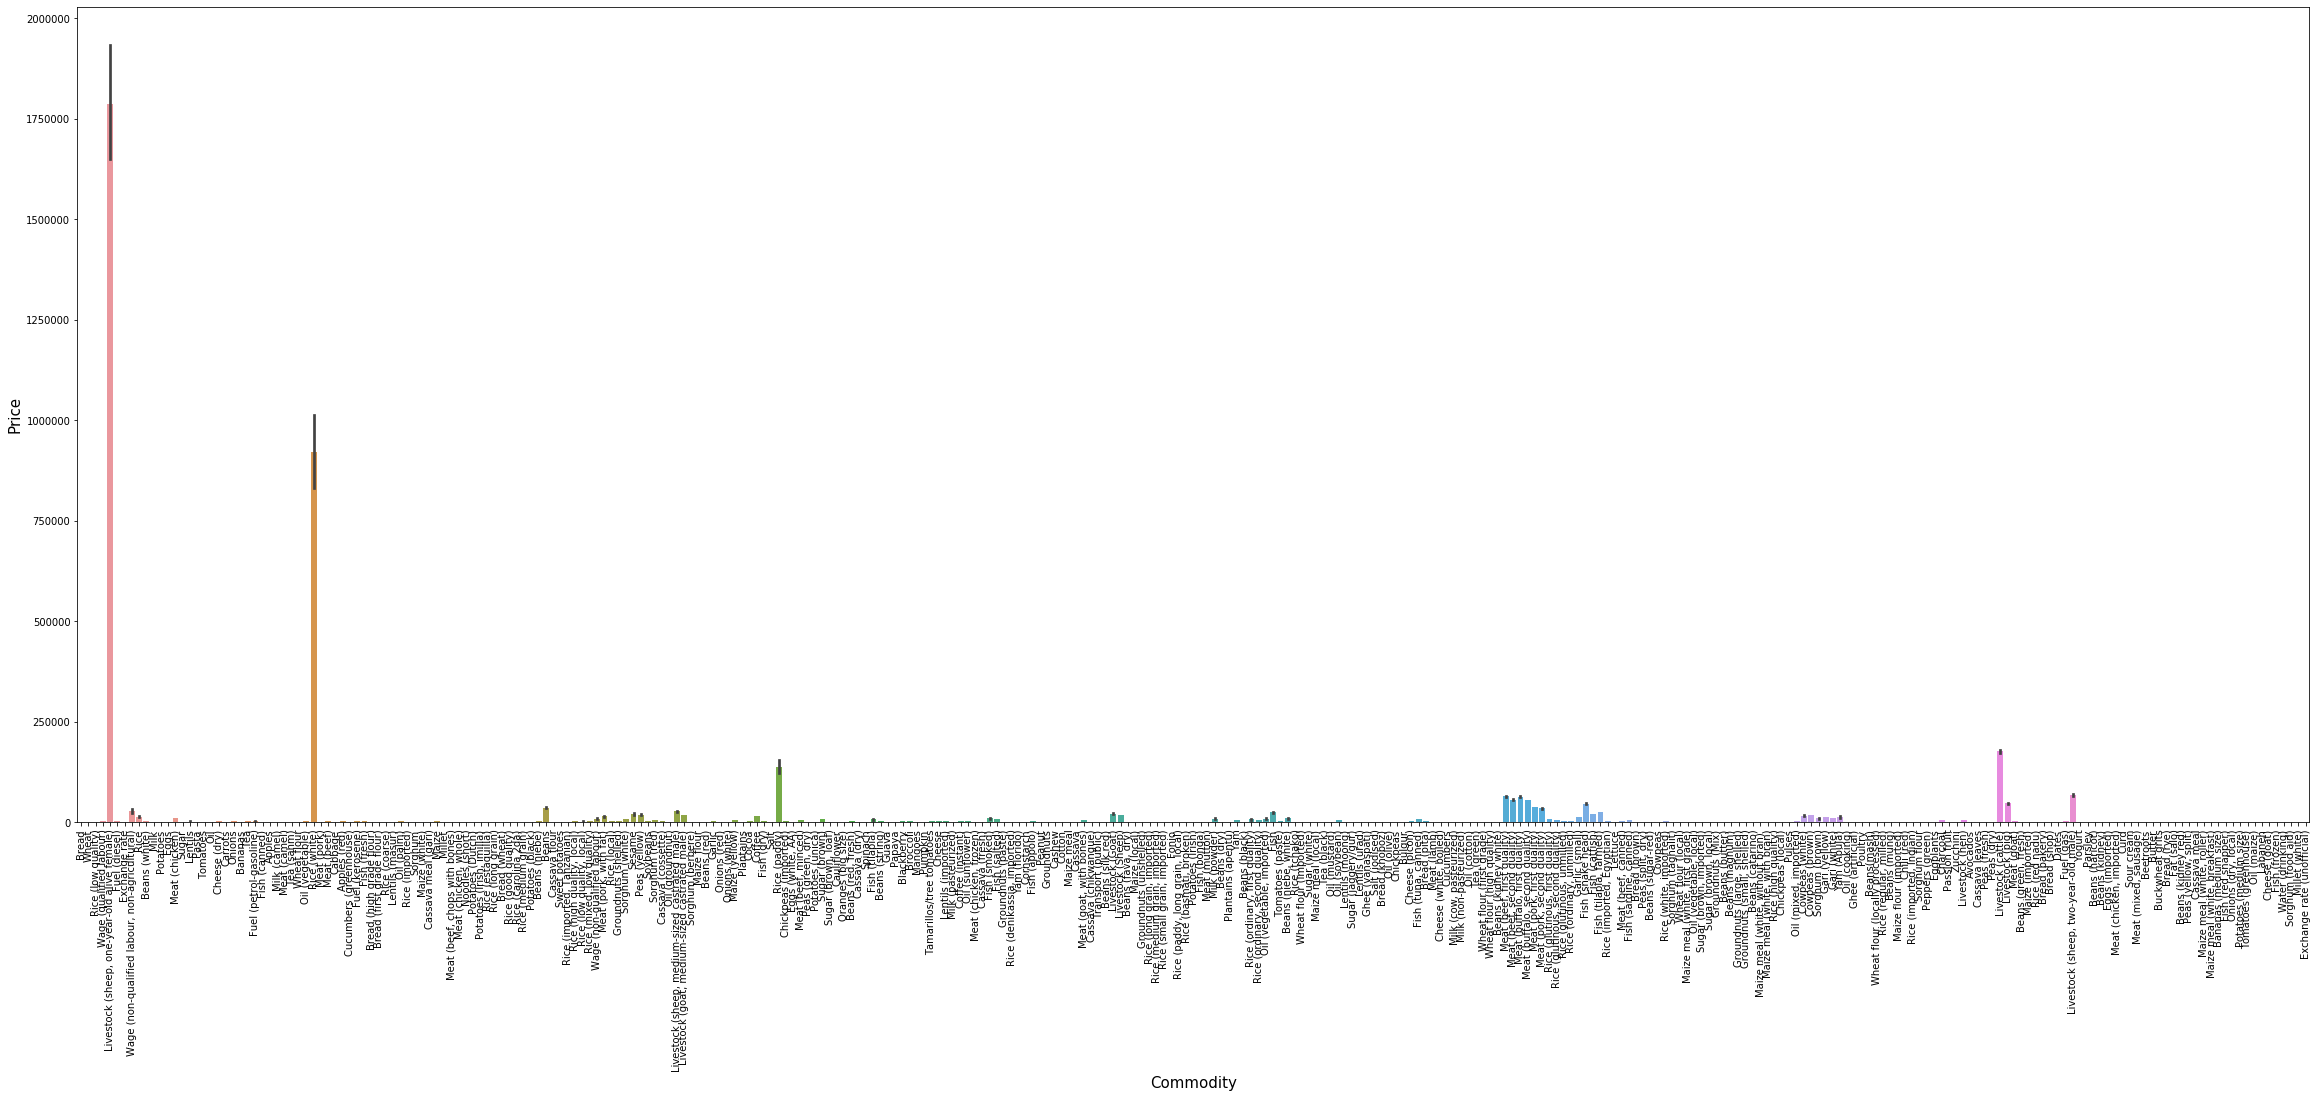

In [51]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'cm_name', y = 'mp_price', data=data)
plt.xticks(rotation=90)
plt.xlabel('Commodity', fontsize=15)
plt.ylabel('Price', fontsize=15)

# Removal of unncessary columns

In [52]:
to_be_removed_cols = []

for column in data.columns:
    if 'name' in column:
        to_be_removed_cols.append(column)

In [53]:
to_be_removed_cols

['adm0_name',
 'adm1_name',
 'mkt_name',
 'cm_name',
 'cur_name',
 'pt_name',
 'um_name']

In [54]:
data.columns

Index(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource'],
      dtype='object')

In [55]:
data.drop(to_be_removed_cols,axis=1,inplace=True)

In [56]:
data.shape

(729965, 11)

In [57]:
data.dtypes

adm0_id                 int64
adm1_id                 int64
mkt_id                  int64
cm_id                   int64
cur_id                  int64
pt_id                   int64
um_id                   int64
mp_month                int64
mp_year                 int64
mp_price              float64
mp_commoditysource     object
dtype: object

In [58]:
len(data['mp_commoditysource'].value_counts().index)

210

# Replacing dummies to prepare the data for applying machine learning

In [60]:
categories = list(data['mp_commoditysource'].value_counts().index)

def column_impute(col):
    return categories.index(col)

data['mp_commoditysource'] = data['mp_commoditysource'].apply(column_impute)

In [61]:
len(data['mp_commoditysource'].value_counts().index)

210

In [62]:
data.dtypes

adm0_id                 int64
adm1_id                 int64
mkt_id                  int64
cm_id                   int64
cur_id                  int64
pt_id                   int64
um_id                   int64
mp_month                int64
mp_year                 int64
mp_price              float64
mp_commoditysource      int64
dtype: object

# Train Test Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = data.drop(['mp_price'],axis=1)
y = data['mp_price']

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=100)

In [66]:
X_train.shape,y_train.shape

((510975, 10), (510975,))

# Importing Machine Learning Algorithms from Sci-kit learn

In [75]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# RandomForestRegression

In [68]:
rf = RandomForestRegressor()

In [69]:
rf.fit(X_train,y_train)

C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [70]:
pred1 = rf.predict(X_test)

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Evaluation of RandomForest

In [72]:
print(mean_absolute_error(y_test,pred1))

320.332071004182


In [73]:
print(mean_squared_error(y_test,pred1))

102337661.81960693


In [74]:
print(r2_score(y_test,pred1))

0.9684575123999885


# DecisionTreeRegression

In [76]:
dt = DecisionTreeRegressor()

In [77]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [78]:
pred2 = dt.predict(X_test)

# Evaluation of Decision Tree

In [79]:
print(mean_absolute_error(y_test,pred2))

324.5082244863529


In [80]:
print(mean_squared_error(y_test,pred2))

81595441.44129318


In [81]:
print(r2_score(y_test,pred2))

0.9748506741885873


# AdaBoostRegression

In [82]:
ada = AdaBoostRegressor()

In [83]:
ada.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [84]:
pred3 = ada.predict(X_test)

# AdaBoost Evaluation

In [85]:
print(mean_absolute_error(y_test,pred3))

4072.7394163377758


In [86]:
print(mean_squared_error(y_test,pred3))

548706282.6157633


In [87]:
print(r2_score(y_test,pred3))

0.8308778917974048


# XGBoost Regression

In [88]:
xg = XGBRegressor()

In [89]:
xg.fit(X_train,y_train)

C:\Users\ganes\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:14:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [90]:
pred4 = xg.predict(X_test)

# Evaluation of XGBoost

In [91]:
print(mean_absolute_error(y_test,pred4))

2378.9774932841356


In [92]:
print(mean_squared_error(y_test,pred4))

452950848.900022


In [93]:
print(r2_score(y_test,pred4))

0.8603916067573631


# Conclusion

## In this notebook, we find that the best model is Decision Tree Regressor, with the least errors and the highest r-square score and hence we use this model for prediction and train the same with upcoming prices, for the model to better and better over time

# Thank You